# Titanic project

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

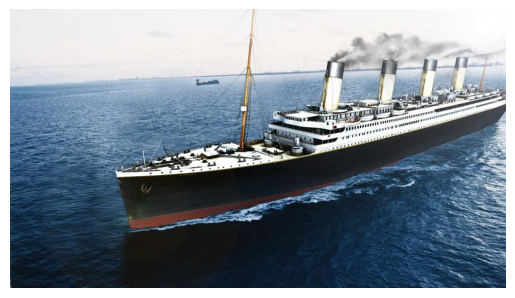

In [2]:
from PIL import Image
import matplotlib.pyplot as plt  # For displaying the image using matplotlib

# Define the image file path using a raw string (prefix with 'r')
image_path = "C:/Users/ssour/Downloads/titanic-ship-painting-x5siaw83l87gtj0x.webp"

# Open an image file
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axes for image display
plt.show()

# Importing Datasets

In [3]:
df=pd.read_csv("C:/Users/ssour/Downloads/titanic.csv")
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Passenger id- Unique Id of the passenger
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Survived- Survived (0 = No; 1 = Yes)
Name- Name of the passenger
Sex- Sex of the passenger (Male, Female)
Age- Age of the passenger
Sibsp- Number of Siblings/Spouses Aboard
Parch- Number of Parents/Children Aboard
Ticket- Ticket Number
Fare- Passenger Fare (British pound)
Cabin- Cabin
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In this dataset we predict the people survived or not and survived columns is my target variable also.

In [4]:
# Here we can see all columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Here we can see that top 10 data 
df.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [6]:
# Here we can see that last 5 data
df.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

# Exploratory Data Analysis

In [7]:
# Here we can see the columns shape like number of colums and rows
df.shape

(891, 12)

In [8]:
print("The dimensions of datasets: ",df.shape)
print("The columns of the datasets: ",df.columns)

The dimensions of datasets:  (891, 12)
The columns of the datasets:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [10]:
# Checking type of the columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# Now checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here we can see that the age , Cabin and embarked columns is have some null values

Now try to replace null vlaues to some data

<Axes: >

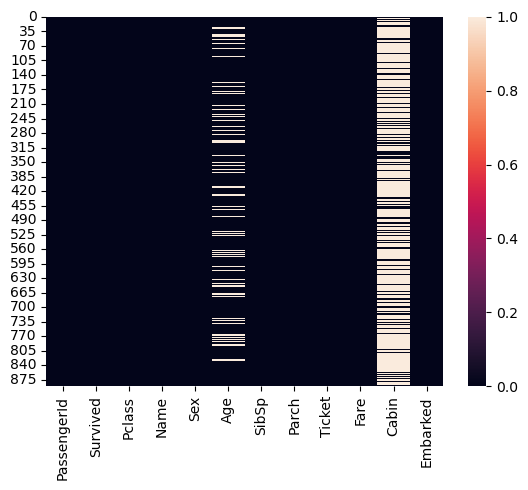

In [12]:
# Lets check the null values using heatmap
sns.heatmap(df.isnull())

In [13]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

In the blank space, we will add the age columns average.

In [14]:
np.mean(df['Age'])

29.69911764705882

Now replace all of the NAN values in Age columns

In [15]:
# Filling null vlaues in Age with its mean
df['Age']= df['Age'].fillna(df['Age'].mean())

Now we succesfully add the mean of the average

Now replace cabin columns to unique data just like e12,e15 thi type

In [16]:
import pandas as pd
import random
def generate_random_value():
    # Define possible letters and numbers
    letters = ['A','B','C','D','E','F','G','H','I']
    numbers = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
    
    # Generate a random letter and number
    random_letter = random.choice(letters)
    random_number = random.choice(numbers)
    
    # Combine letter and number into the desired format
    random_value = f"{random_letter}{random_number}"
    
    return random_value

In [17]:
# Fill null values in 'Cabin' column with random value ("e12" format)
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].apply(lambda x: generate_random_value() if pd.isna(x) else x))

# Display the updated DataFrame
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Cabin Embarked  
0        1      0         A/5 21171   7.2500   C19        S  
1        1      0          PC 17599  71.2833   C85        C  
2        0      0  STON/O2. 3101282   7.9250   B16        S  
3        1      0            113803  53.1000  C123        S  
4        0      0            373450   8.0500   B16        S  
..     ...    ...               ...      ...   ...      ...  
886      0      0            211536  13.0000   H18        S  
887      0      0            112053  30.0000   B42        S  
888      1      2        W./C. 6607  23.4500   B16        S  
889      0      0            111369  30.0000  C148        C  
890      0      0            370376   7.7500   G19        Q  

[891 rows x 12 columns]

Now replace nan values in embarked columns

In [18]:
def generate_random_embarked():
    # Specify possible values for 'Embarked'
    embarked_values = ["C", "S", "Q"]
    
    # Choose a random value from the specified list
    random_value = random.choice(embarked_values)
    
    return random_value

In [19]:
# Fill null values in 'Embarked' column with random values ("C", "S", "Q")
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].apply(lambda x: generate_random_embarked() if pd.isna(x) else x))

# Display the updated DataFrame
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Cabin Embarked  
0        1      0         A/5 21171   7.2500   C19        S  
1        1      0          PC 17599  71.2833   C85        C  
2        0      0  STON/O2. 3101282   7.9250   B16        S  
3        1      0            113803  53.1000  C123        S  
4        0      0            373450   8.0500   B16        S  
..     ...    ...               ...      ...   ...      ...  
886      0      0            211536  13.0000   H18        S  
887      0      0            112053  30.0000   B42        S  
888      1      2        W./C. 6607  23.4500   B16        S  
889      0      0            111369  30.0000  C148        C  
890      0      0            370376   7.7500   G19        Q  

[891 rows x 12 columns]

In [20]:
# Now Checking for null values after replacing the right  values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Here we can see that all values is looks like good

<Axes: >

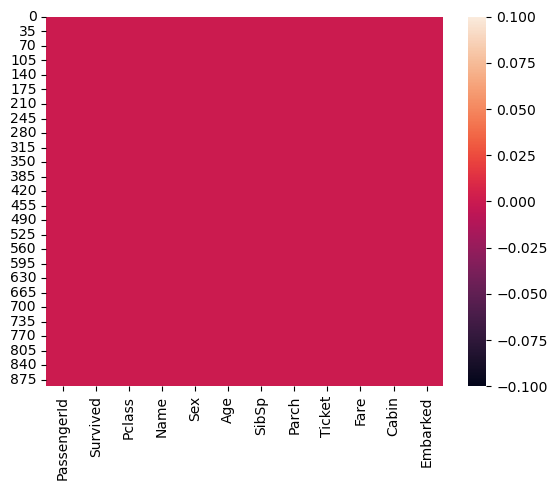

In [21]:
# Now again check the null values using heatmap
sns.heatmap(df.isnull())

Now you can see that no null values are present in this datasets

In [22]:
# Now again check data types of all columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
# Now separating the categorical columns and numercial columns
# Separating Numerical and Categorical Columns

# Checking for categorical Coumns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
print("\n")

# Checking for numerical columns
numerical_col = []
for i  in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Categorical Columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Numerical Columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Here we can see that in categorical columns there are 5 columns and numerical columns there are 7 columns contains

In [24]:
# Checking number of unique values in ech column
df.nunique().to_frame("No. of unique values")

No. of unique values
PassengerId                   891
Survived                        2
Pclass                          3
Name                          891
Sex                             2
Age                            89
SibSp                           7
Parch                           7
Ticket                        681
Fare                          248
Cabin                         224
Embarked                        3

In [25]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [26]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [27]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [28]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [29]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [30]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

# Visualize the data

0    549
1    342
Name: Survived, dtype: int64


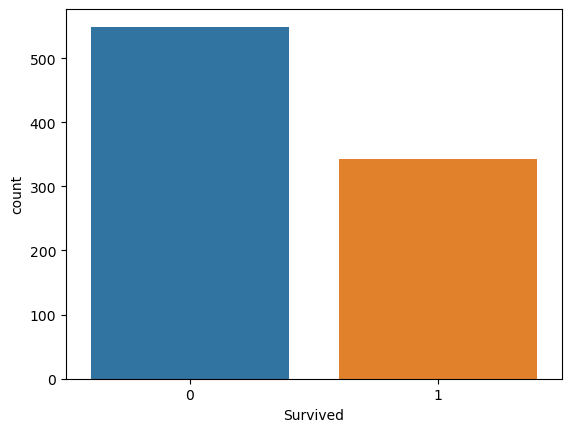

In [31]:
# visualize the number of  people survived
ax=sns.countplot(x='Survived',data=df)
print(df['Survived'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


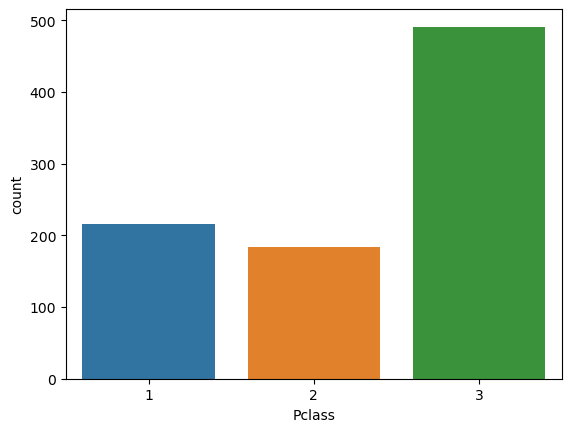

In [32]:
# visualize 
ax=sns.countplot(x='Pclass',data=df)
print(df['Pclass'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


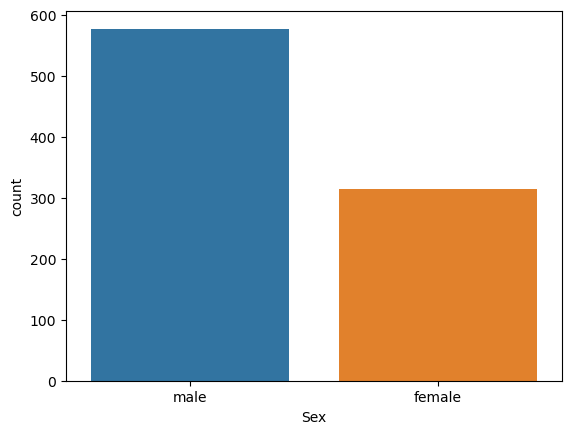

In [33]:
# visualize the number of sex columns
ax=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


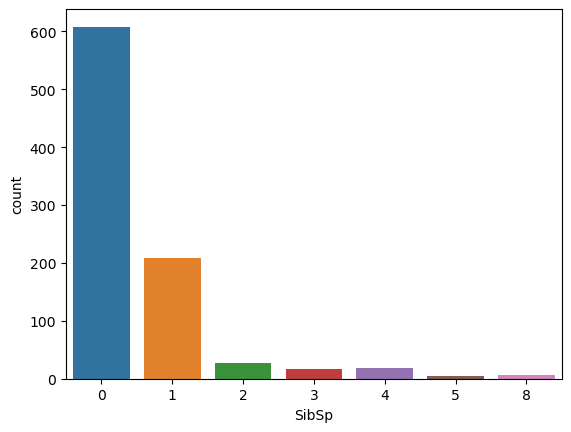

In [34]:
# visualize 
ax=sns.countplot(x='SibSp',data=df)
print(df['SibSp'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


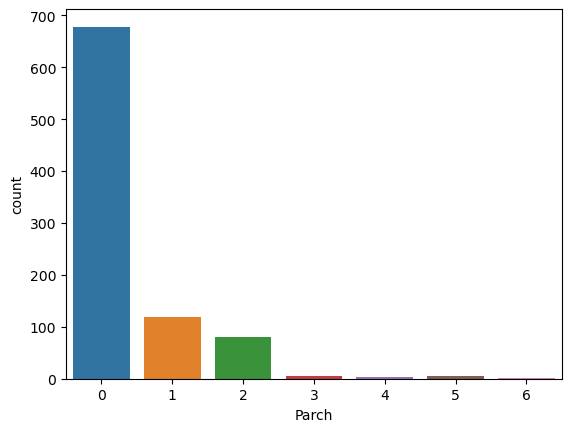

In [35]:
# visualize the number of  people
ax=sns.countplot(x='Parch',data=df)
print(df['Parch'].value_counts())

S    644
C    169
Q     78
Name: Embarked, dtype: int64


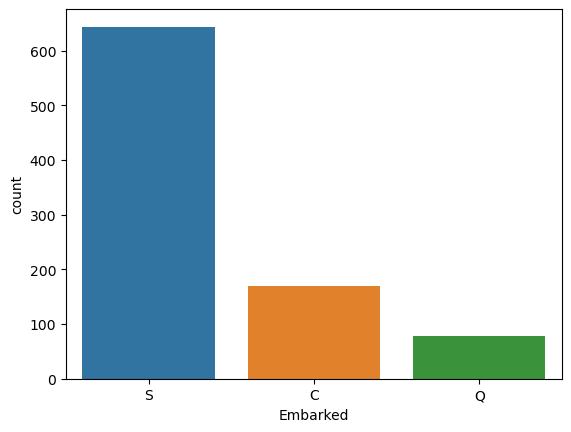

In [36]:
# visualize 
ax=sns.countplot(x='Embarked',data=df)
print(df['Embarked'].value_counts())

# Data Distributed

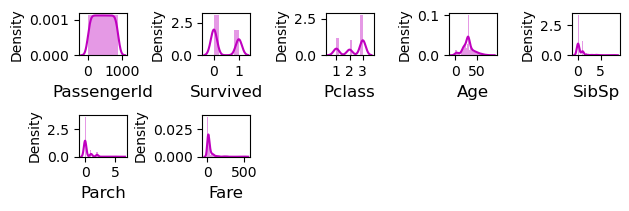

In [37]:
plotnumber = 1  # Initialize subplot number
for col in numerical_col:
    if plotnumber <= 10:  # Ensure plotnumber is within valid range (1 to 4 for a 2x2 grid)
        ax = plt.subplot(5,5, plotnumber)
        sns.distplot(df[col], color="m")
        plt.xlabel(col, fontsize=12)
        plotnumber += 1  # Increment plotnumber for the next subplot
    else:
        break  # Exit loop if plotnumber exceeds the maximum number of subplots

plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()  # Display the figure with subplots

# Relational Analysis

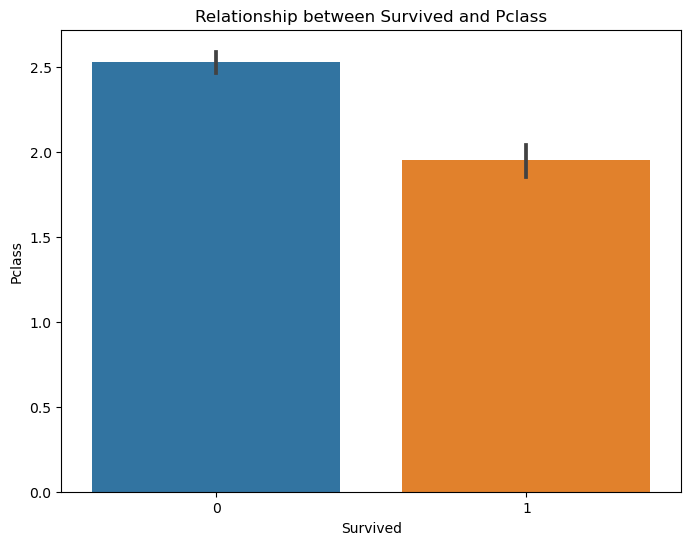

In [38]:
# Survived columns and Pclass
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Survived", y="Pclass", data=df)

# Set labels and title
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.title("Relationship between Survived and Pclass")

# Show the plot
plt.show()

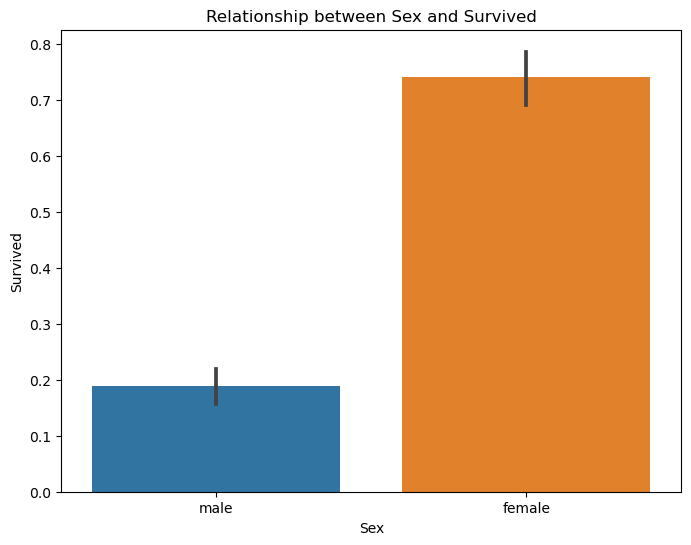

In [39]:
# Survived columns and Sex columns
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Sex", y="Survived", data=df)

# Set labels and title
plt.xlabel("Sex")
plt.ylabel("Survived")
plt.title("Relationship between Sex and Survived")

# Show the plot
plt.show()

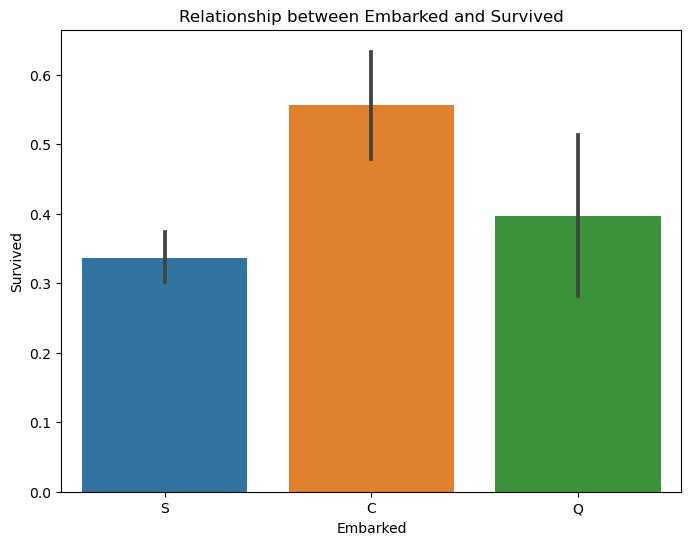

In [40]:
# Survived columns and Pclass
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Embarked", y="Survived", data=df)

# Set labels and title
plt.xlabel("Embarked")
plt.ylabel("Survived")
plt.title("Relationship between Embarked and Survived")

# Show the plot
plt.show()

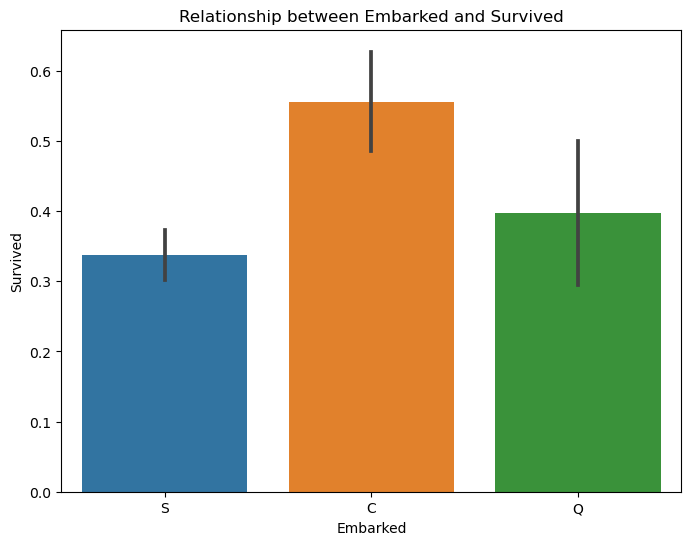

In [41]:
# Survived columns and Pclass
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Embarked", y="Survived", data=df)

# Set labels and title
plt.xlabel("Embarked")
plt.ylabel("Survived")
plt.title("Relationship between Embarked and Survived")

# Show the plot
plt.show()

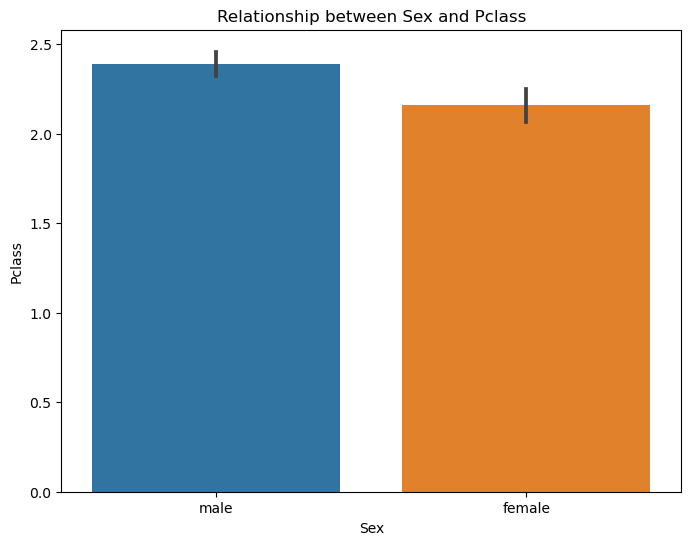

In [42]:
# Sex columns and Pclass
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Sex", y="Pclass", data=df)

# Set labels and title
plt.xlabel("Sex")
plt.ylabel("Pclass")
plt.title("Relationship between Sex and Pclass")

# Show the plot
plt.show()

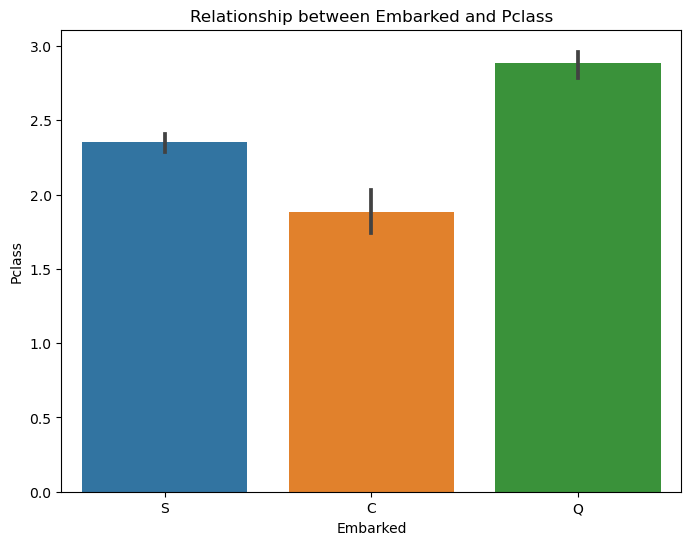

In [43]:
# Embarked columns and Pclass
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="Embarked", y="Pclass", data=df)

# Set labels and title
plt.xlabel("Embarked")
plt.ylabel("Pclass")
plt.title("Relationship between Embarked and Pclass")

# Show the plot
plt.show()

# Multivariate Analysis

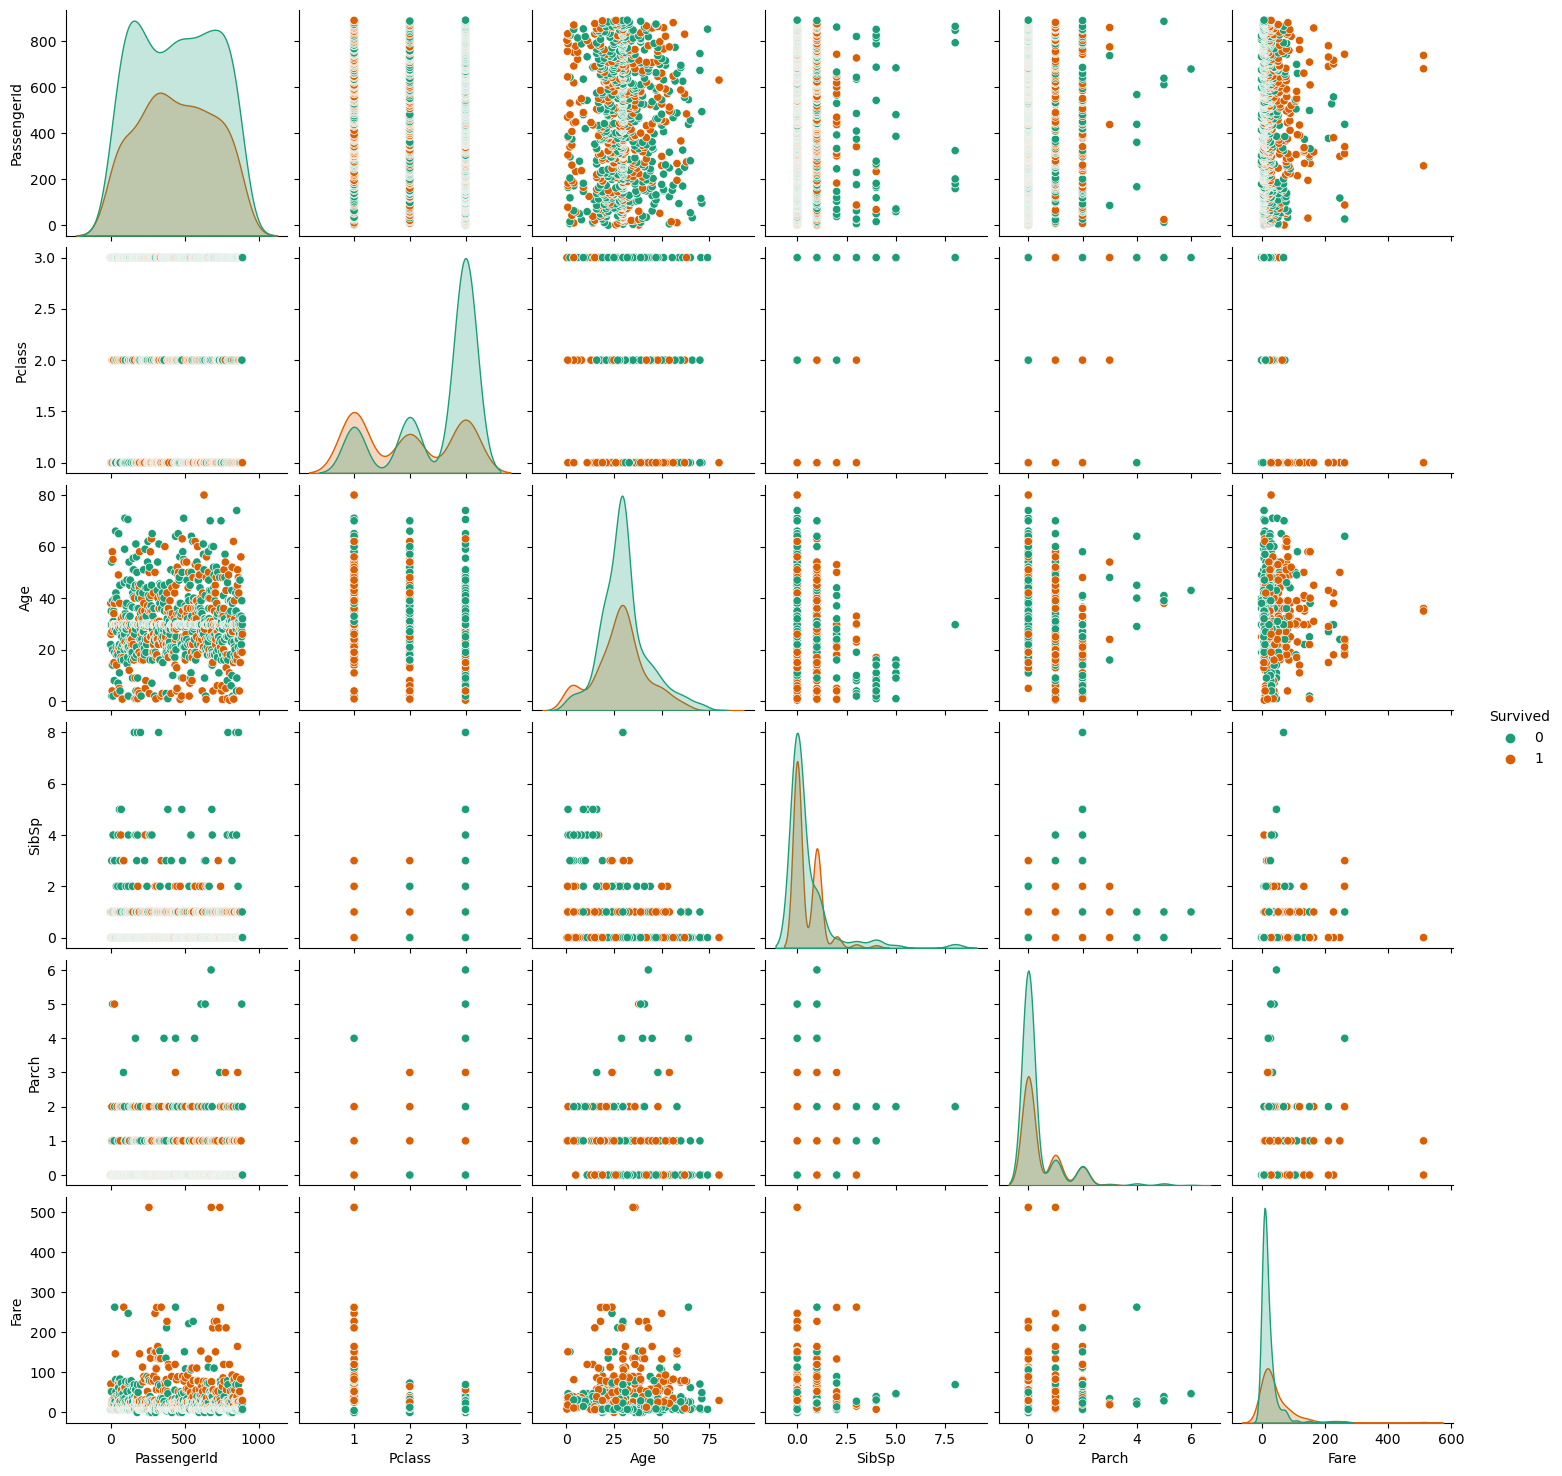

In [44]:
sns.pairplot(df,hue = "Survived",palette="Dark2")
plt.show()

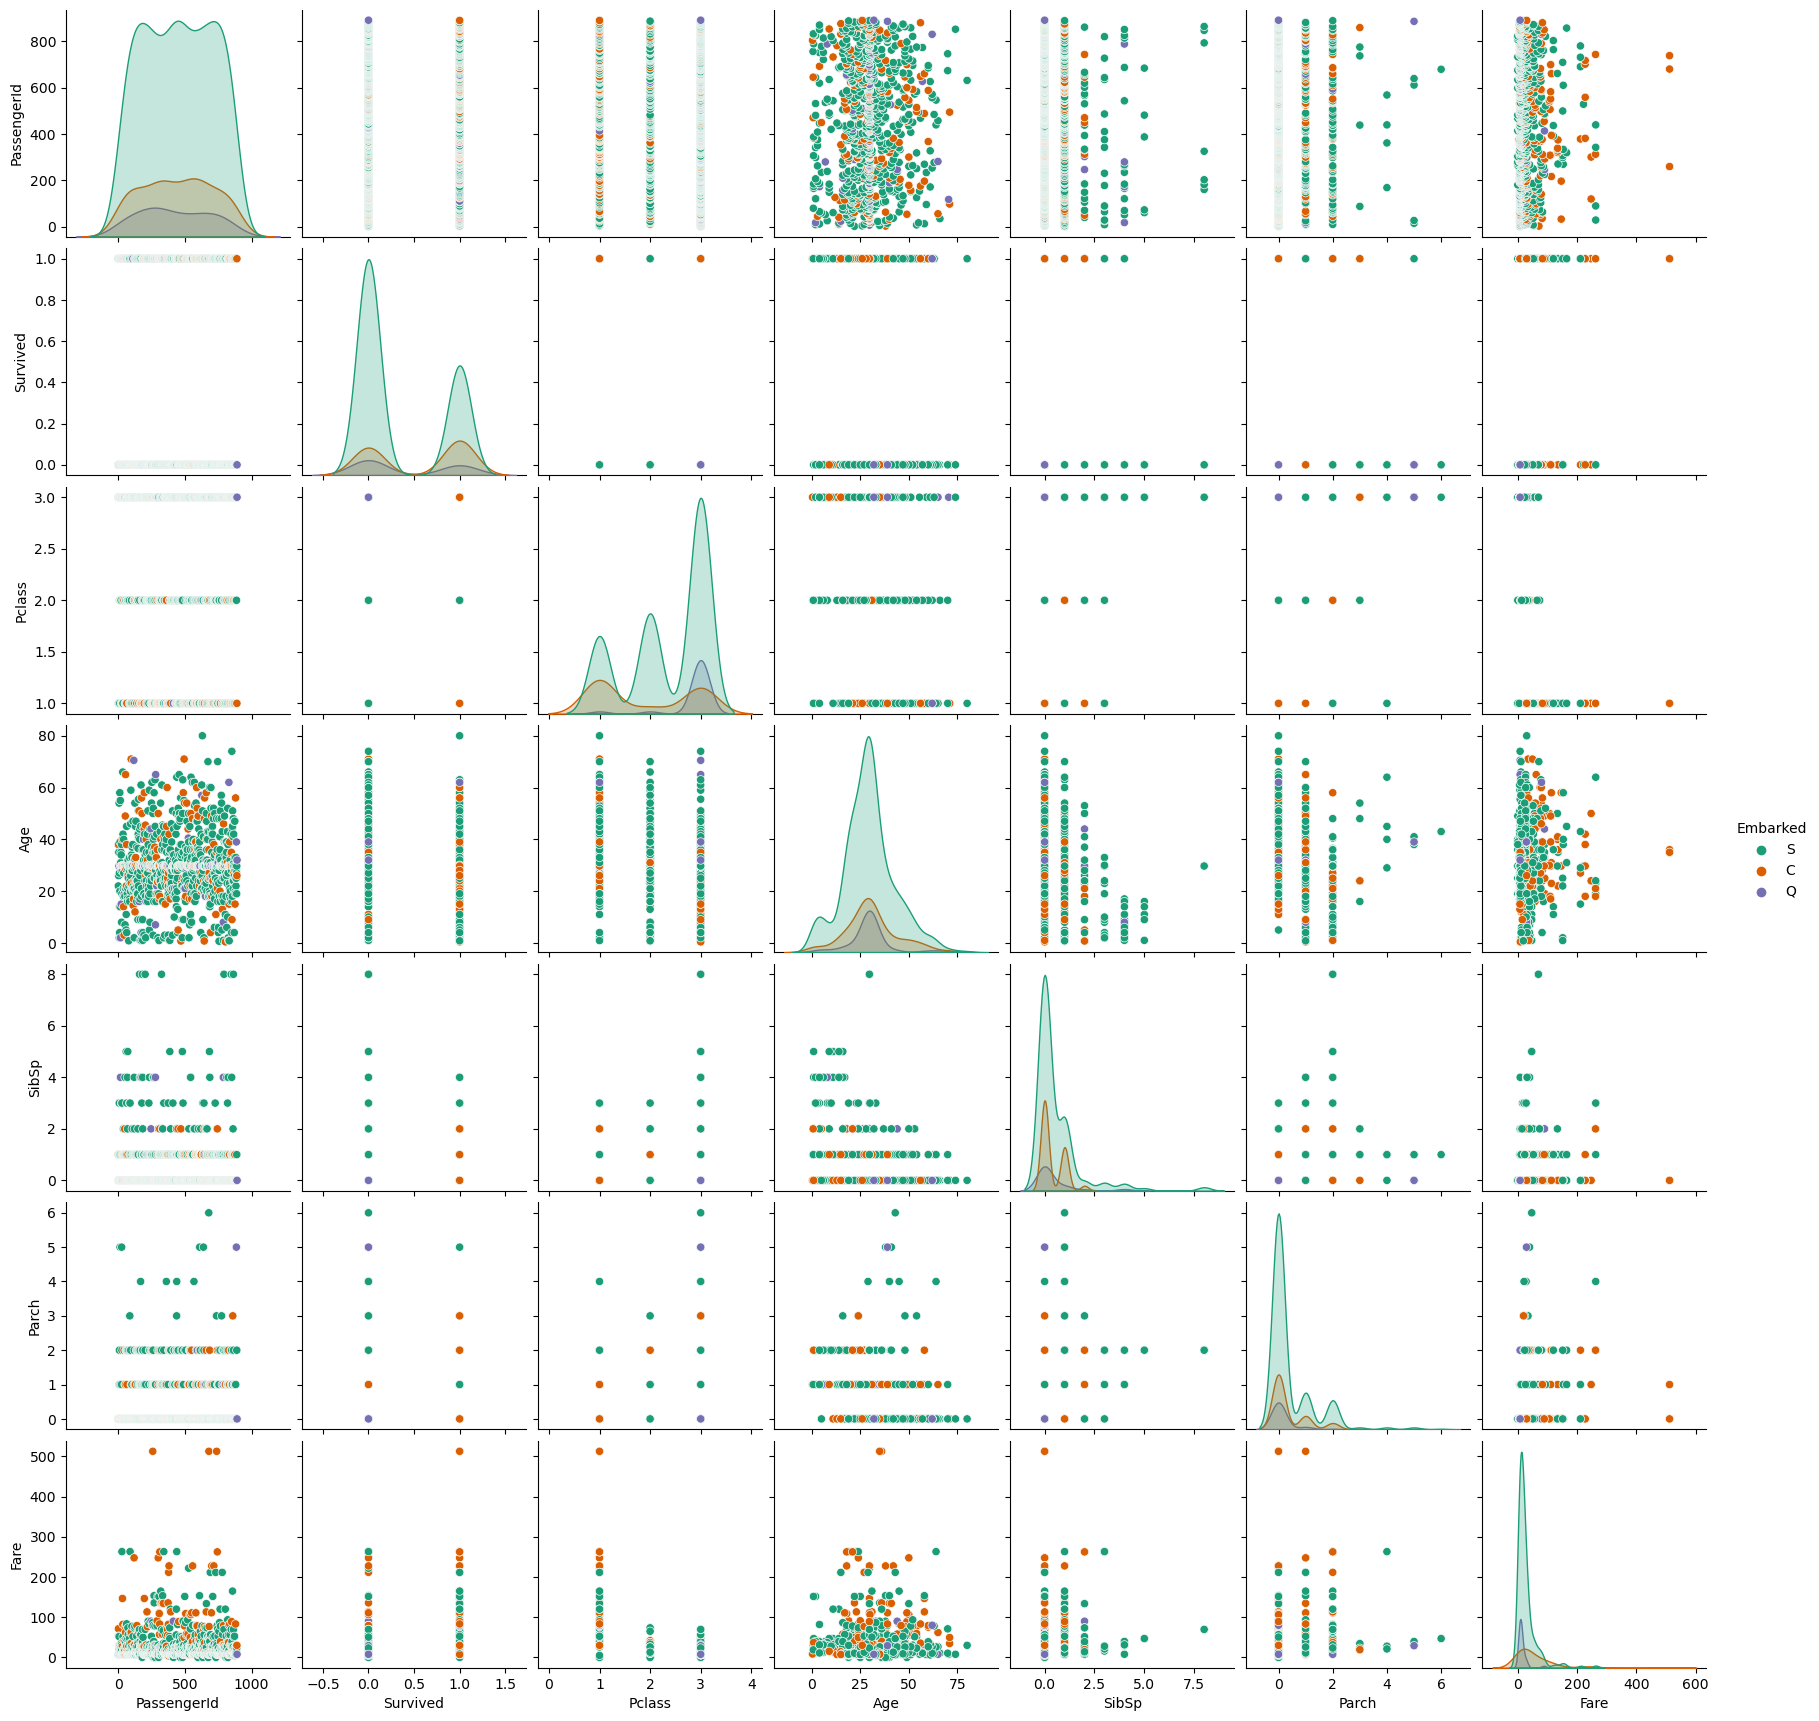

In [45]:
sns.pairplot(df,hue = "Embarked",palette="Dark2")
plt.show()

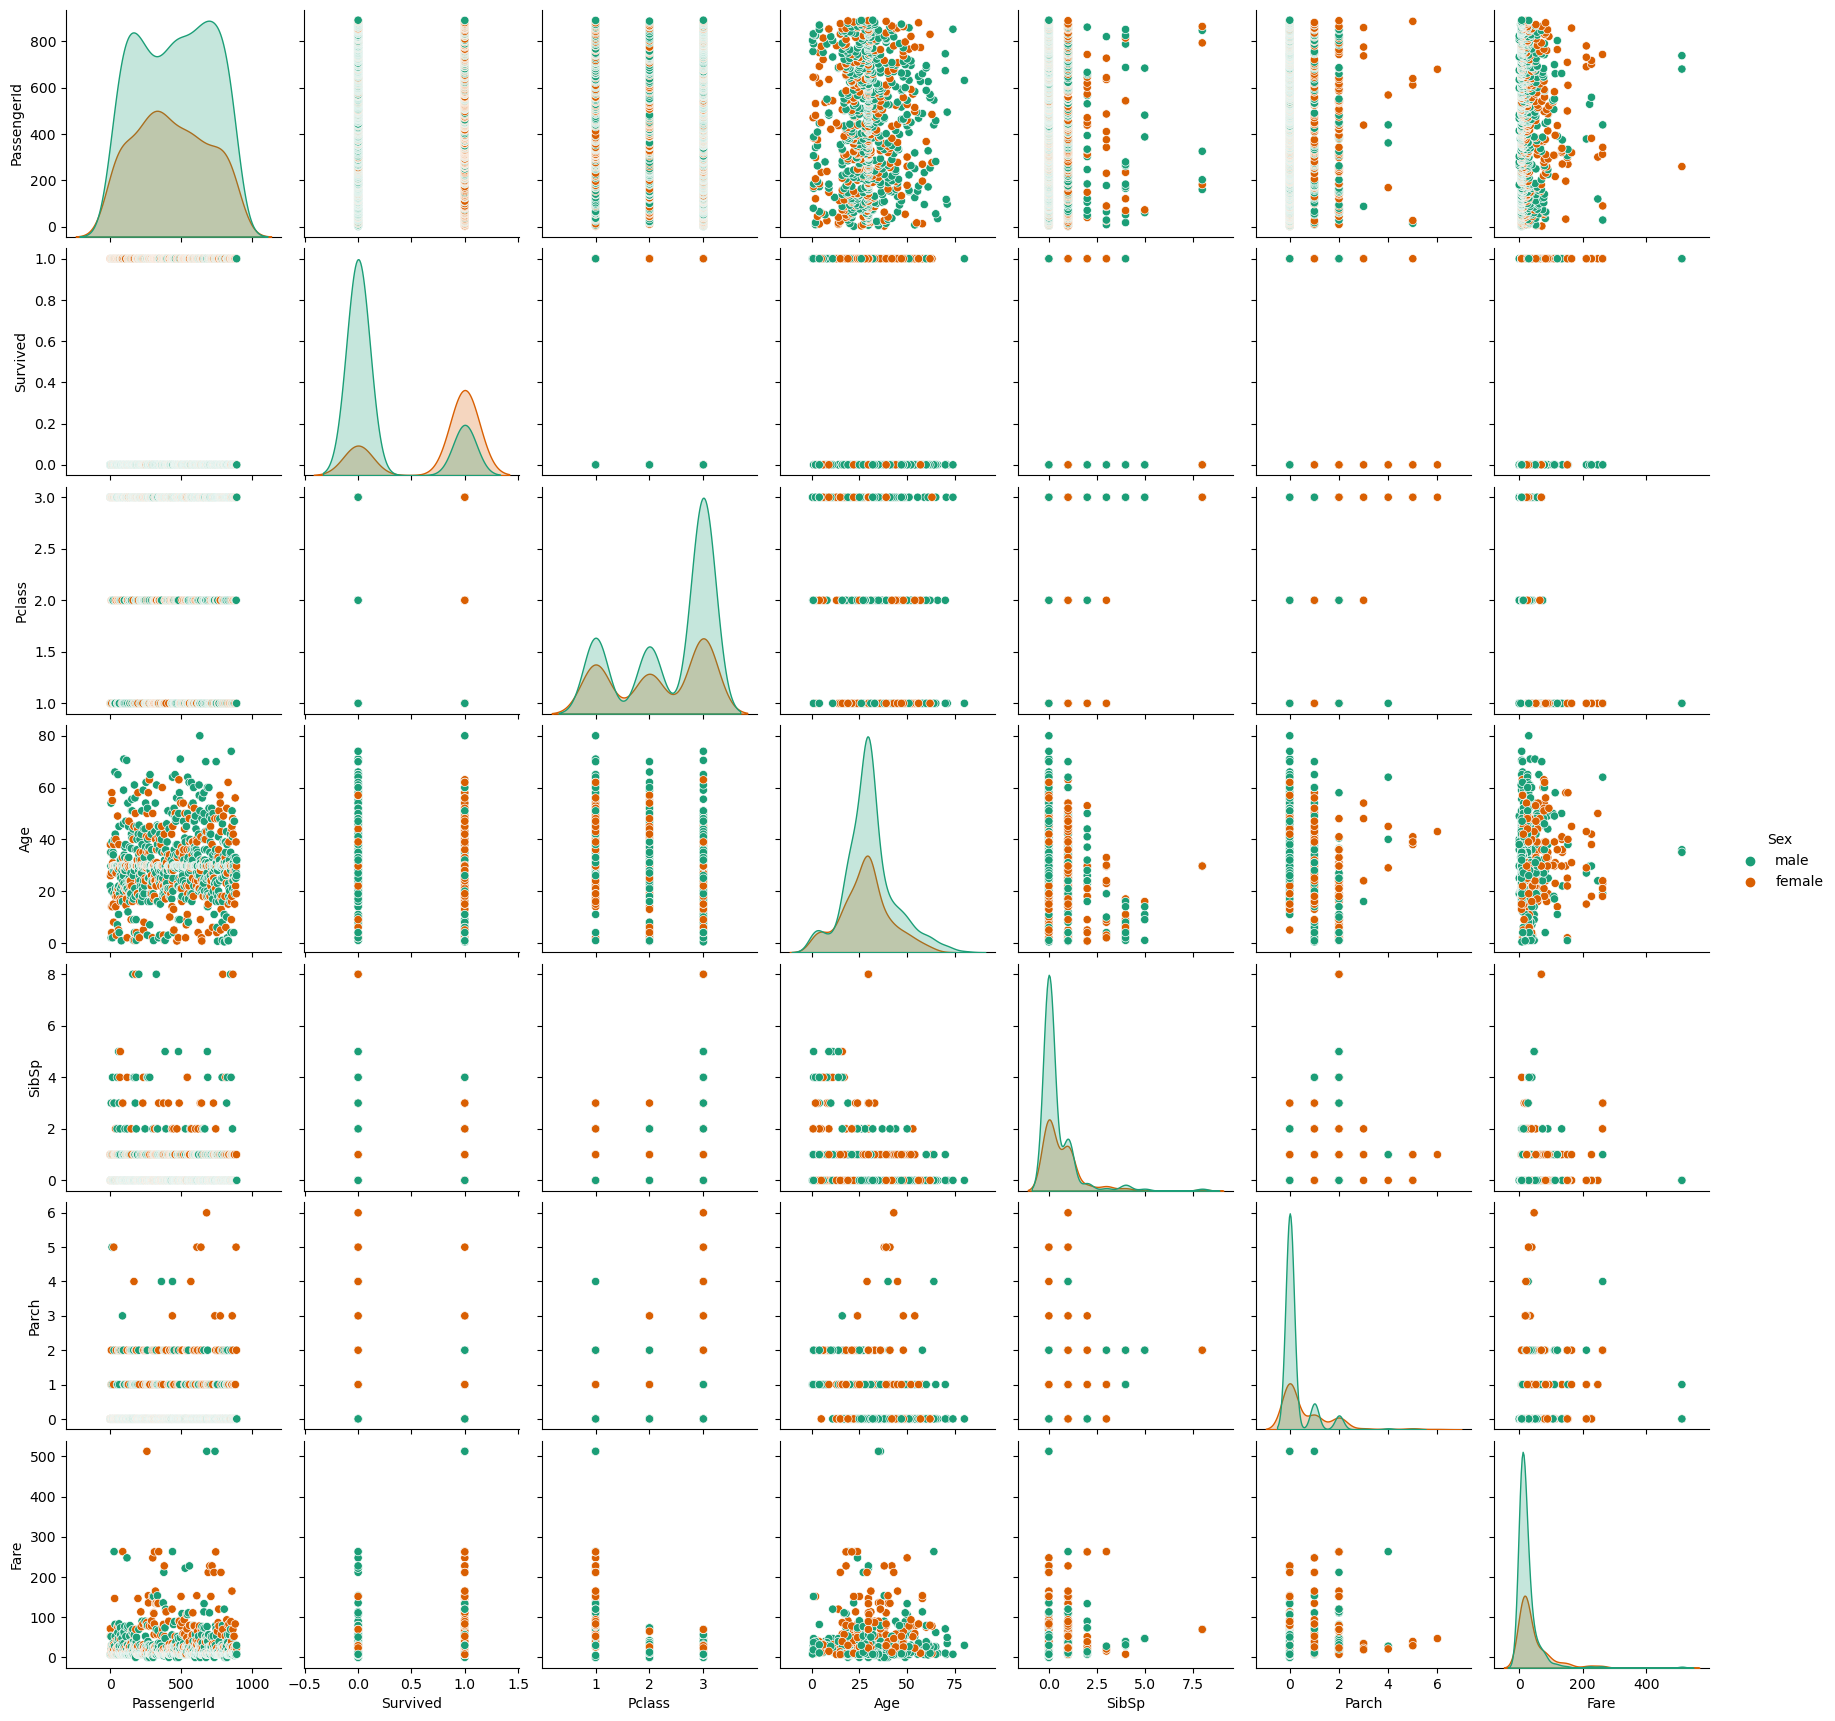

In [46]:
sns.pairplot(df,hue = "Sex",palette="Dark2")
plt.show()

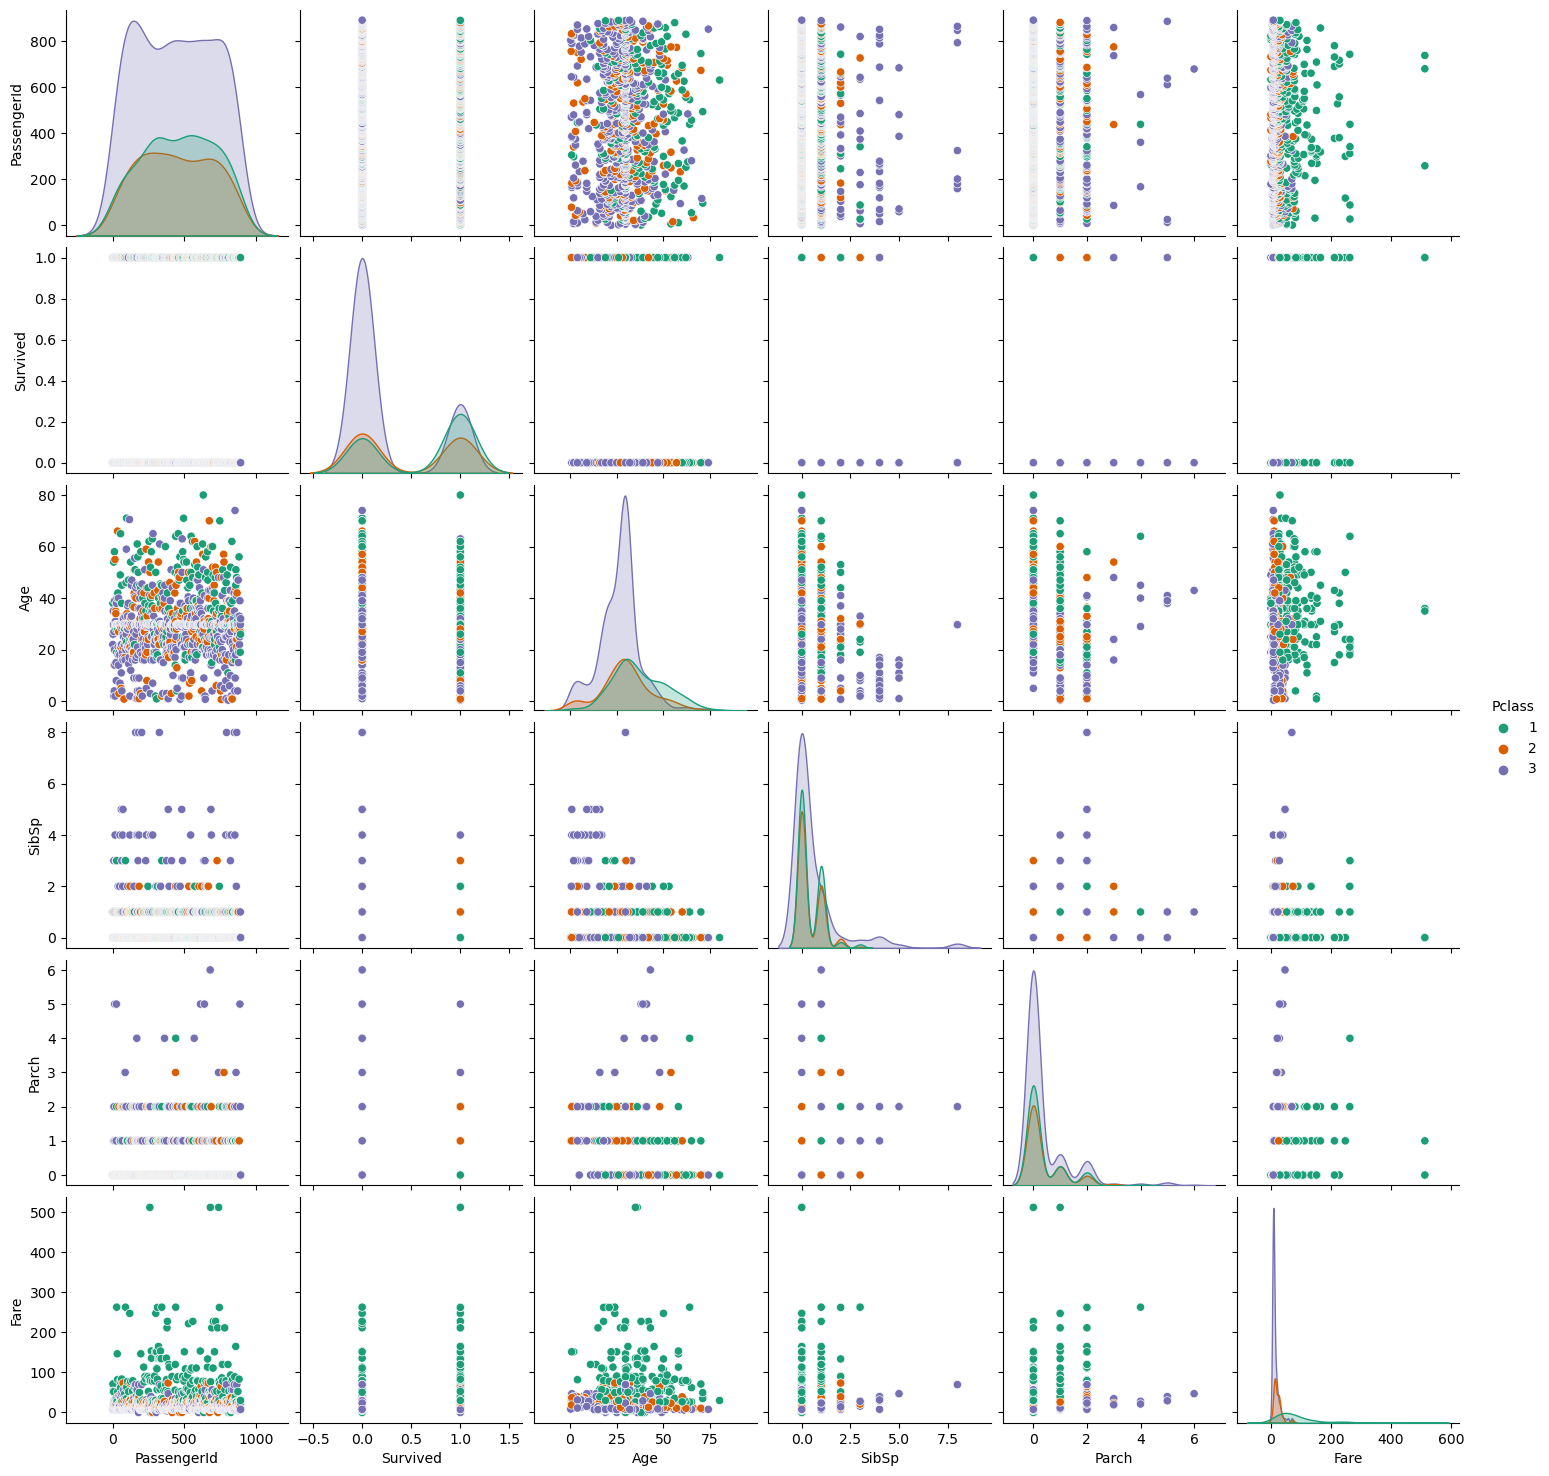

In [47]:
sns.pairplot(df,hue = "Pclass",palette="Dark2")
plt.show()

# Checking for outliers

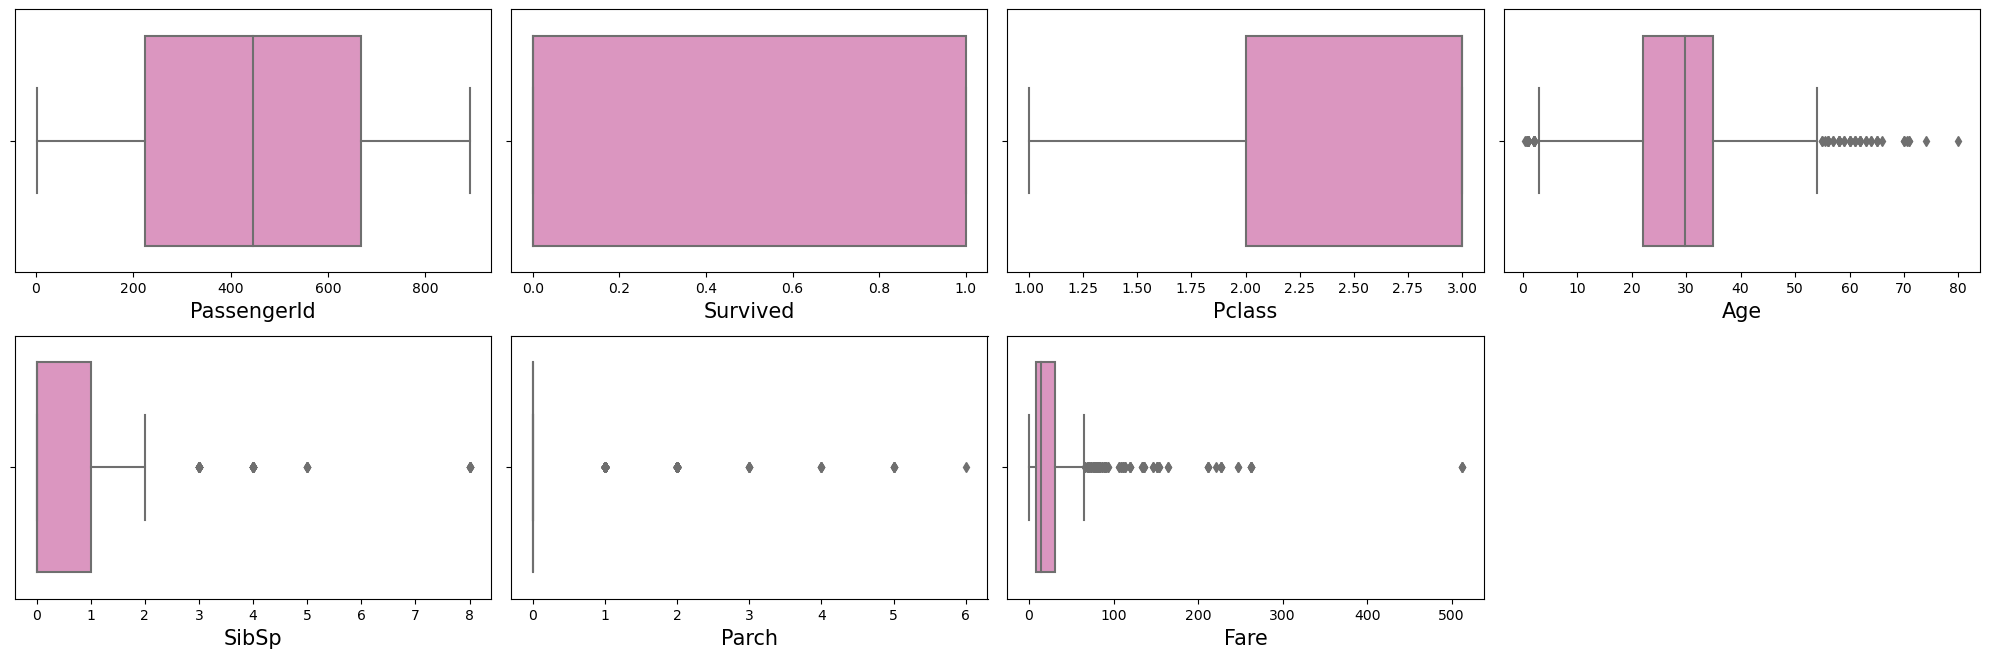

In [48]:
# Now we check the data have outliers or not
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

Here we can see that in age,sibsp,parch and fare columns contains some outliers 

# Using IQR method to remove outliers

In [49]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest = ['Age', 'SibSp', 'Parch','Fare']
Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df[~((df[columns_of_interest] < lower_bound) | (df[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)


DataFrame after removing outliers:
     PassengerId  Survived  Pclass  \
0              1         0       3   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
..           ...       ...     ...   
884          885         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                             Name     Sex        Age  SibSp  \
0                         Braund, Mr. Owen Harris    male  22.000000      1   
2                          Heikkinen, Miss. Laina  female  26.000000      0   
3    Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000      1   
4                        Allen, Mr. William Henry    male  35.000000      0   
5                                Moran, Mr. James    male  29.699118      0   
..                                

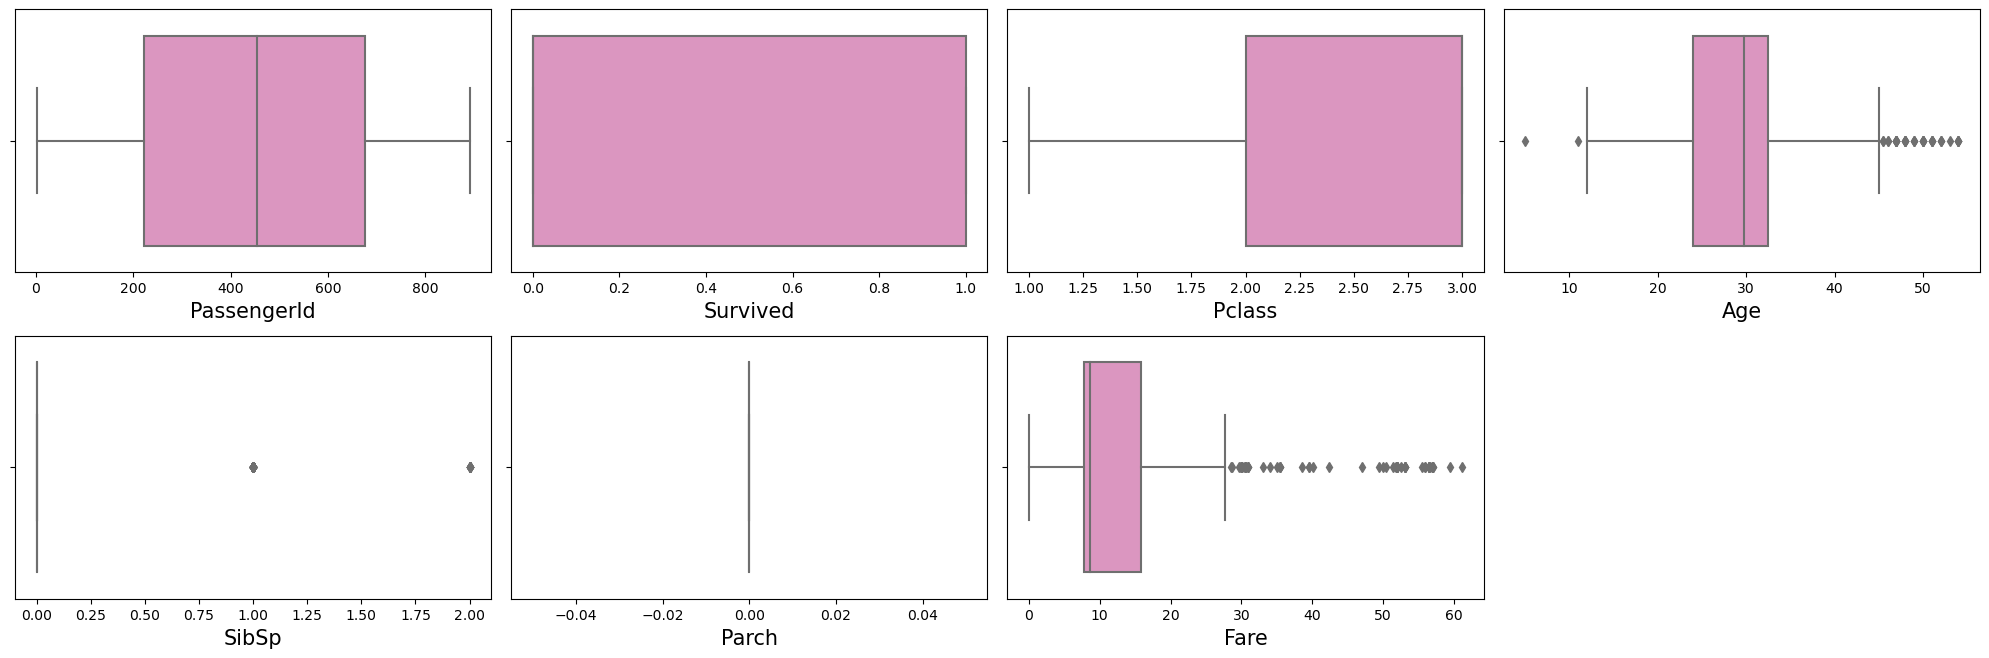

In [50]:
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df1[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

Now again use IQR method because some of the outliers not removed

In [51]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest =['Age', 'SibSp', 'Parch','Fare']
Q1 = df1[columns_of_interest].quantile(0.25)
Q3 = df1[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df1[((df1[columns_of_interest] < lower_bound) | (df1[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df1[~((df1[columns_of_interest] < lower_bound) | (df1[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)


DataFrame after removing outliers:
     PassengerId  Survived  Pclass                                  Name  \
2              3         1       3                Heikkinen, Miss. Laina   
4              5         0       3              Allen, Mr. William Henry   
5              6         0       3                      Moran, Mr. James   
12            13         0       3        Saundercock, Mr. William Henry   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
..           ...       ...     ...                                   ...   
882          883         0       3          Dahlberg, Miss. Gerda Ulrika   
883          884         0       2         Banfield, Mr. Frederick James   
884          885         0       3                Sutehall, Mr. Henry Jr   
886          887         0       2                 Montvila, Rev. Juozas   
890          891         0       3                   Dooley, Mr. Patrick   

        Sex        Age  SibSp  Parch            Tick

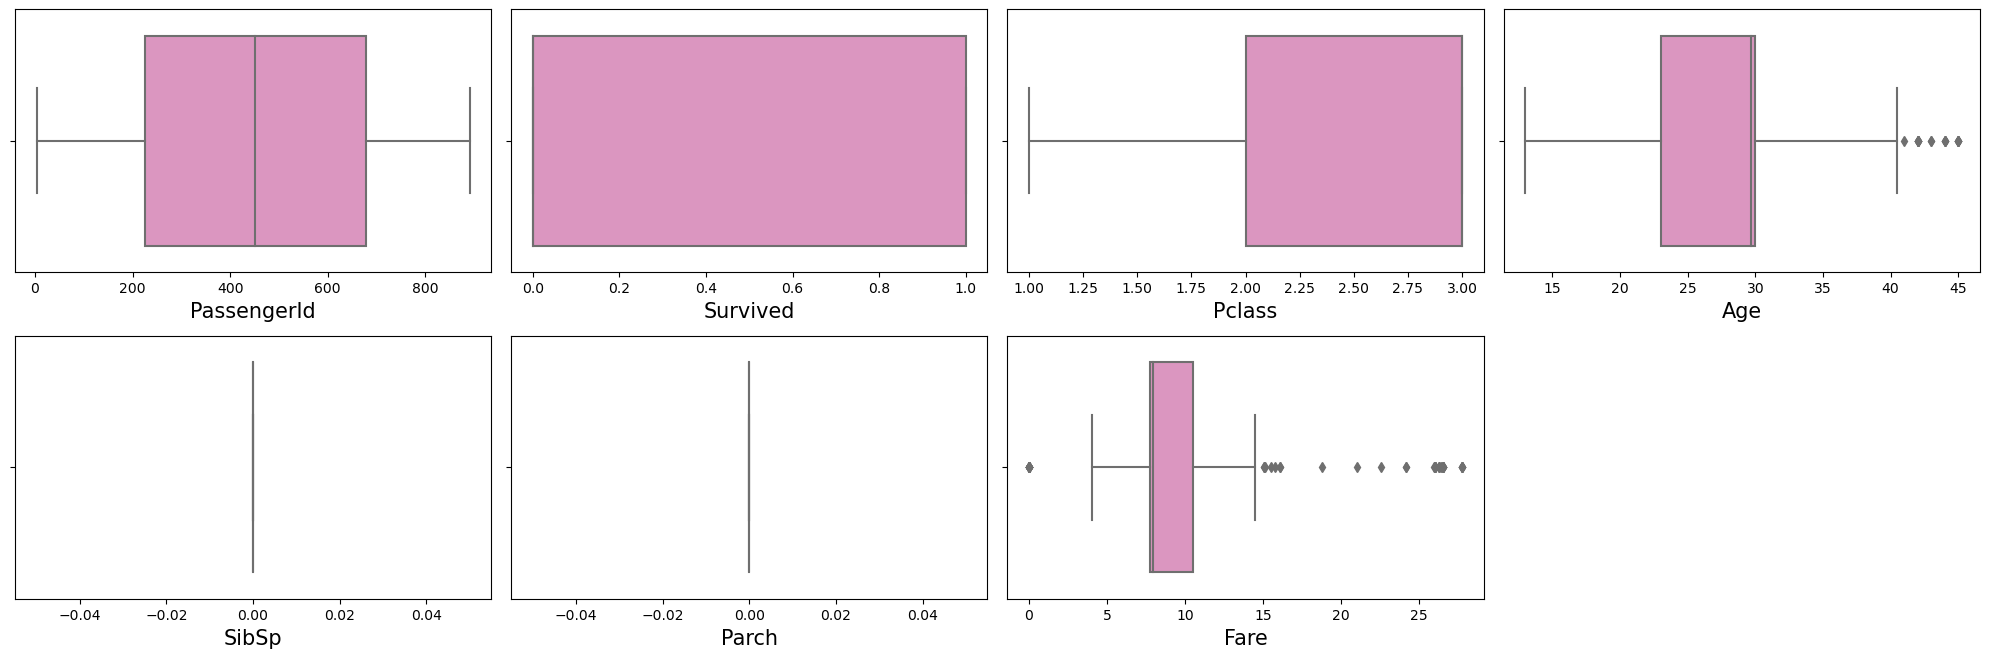

In [52]:
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df1[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

In [53]:
# Now click so many time to remove outliers and also check outliers is removed or not .

In [63]:
import pandas as pd

# Assuming df is your DataFrame containing the relevant columns

# Calculate IQR
columns_of_interest =['Fare']
Q1 = df1[columns_of_interest].quantile(0.25)
Q3 = df1[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df1[((df1[columns_of_interest] < lower_bound) | (df1[columns_of_interest] > upper_bound)).any(axis=1)]

# Remove outliers
df1 = df1[~((df1[columns_of_interest] < lower_bound) | (df1[columns_of_interest] > upper_bound)).any(axis=1)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)


DataFrame after removing outliers:
     PassengerId  Survived  Pclass                                  Name  \
2              3         1       3                Heikkinen, Miss. Laina   
4              5         0       3              Allen, Mr. William Henry   
12            13         0       3        Saundercock, Mr. William Henry   
14            15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
22            23         1       3           McGowan, Miss. Anna "Annie"   
..           ...       ...     ...                                   ...   
870          871         0       3                     Balkic, Mr. Cerin   
877          878         0       3                  Petroff, Mr. Nedelio   
878          879         0       3                    Laleff, Mr. Kristo   
881          882         0       3                    Markun, Mr. Johann   
890          891         0       3                   Dooley, Mr. Patrick   

        Sex        Age  SibSp  Parch            Tick

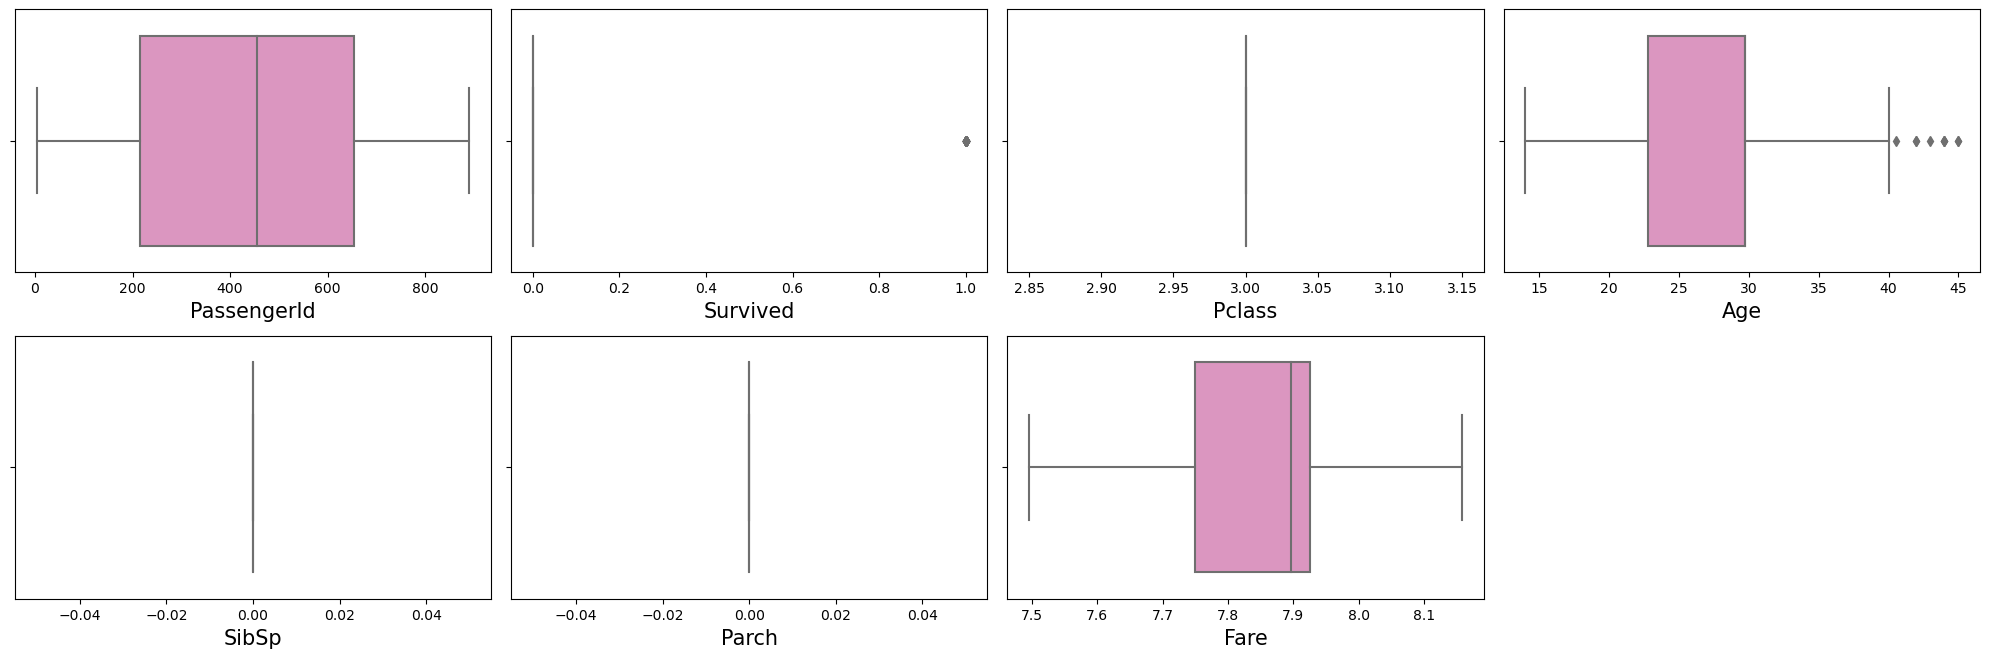

In [64]:
num_numerical_cols = len(numerical_col)
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols

# Create a new figure and set its size
plt.figure(figsize=(20, 16), facecolor="white")  # Adjust the figure size as needed

# Iterate over numerical columns and create subplots for boxplots
plotnumber = 1
for col in numerical_col:
    if plotnumber <= total_subplots:
        # Create subplot at the specified position
        ax = plt.subplot(num_rows, num_cols, plotnumber)
        
        # Plot boxplot for the current column using seaborn
        sns.boxplot(x=df1[col], palette="Set2_r", ax=ax)
        
        # Customize subplot labels and ticks
        plt.xlabel(col, fontsize=15)
        plt.ylabel("")  # Clear y-axis label
        plt.xticks(rotation=0, fontsize=10)
        plt.yticks(fontsize=10)
        
        plotnumber += 1  # Increment plotnumber for the next subplot

# Adjust layout to prevent overlap and improve readability
plt.tight_layout()
plt.show()  # Display the figure with subplots

At last outliers is removed but some outliers not removed

# Now Checking Skewness

In [65]:
# Encoding categorical columns using OrdinalEnocoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes =="object":
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))
df1

PassengerId  Survived  Pclass   Name  Sex        Age  SibSp  Parch  \
2              3         1       3   54.0  0.0  26.000000      0      0   
4              5         0       3    4.0  1.0  35.000000      0      0   
12            13         0       3  148.0  1.0  20.000000      0      0   
14            15         0       3  178.0  0.0  14.000000      0      0   
22            23         1       3   95.0  0.0  15.000000      0      0   
..           ...       ...     ...    ...  ...        ...    ...    ...   
870          871         0       3    8.0  1.0  26.000000      0      0   
877          878         0       3  135.0  1.0  19.000000      0      0   
878          879         0       3   81.0  1.0  29.699118      0      0   
881          882         0       3   91.0  1.0  33.000000      0      0   
890          891         0       3   37.0  1.0  32.000000      0      0   

     Ticket    Fare  Cabin  Embarked  
2     180.0  7.9250   13.0       2.0  
4     133.0  8.0500   13.0       2.0  
12    156.0  8.0500   31.0       2.0  
14    102.0  7.8542   28.0       2.0  
22     15.0  8.0292   43.0       1.0  
..      ...     ...    ...       ...  
870    85.0  7.8958   19.0       2.0  
877    61.0  7.8958   40.0       2.0  
878    66.0  7.8958   73.0       2.0  
881    91.0  7.8958   17.0       2.0  
890   129.0  7.7500   63.0       1.0  

[184 rows x 12 columns]

In [66]:
# Now all data are converted into numercial form so no we check skewness
df1.skew()

PassengerId   -0.073742
Survived       1.233230
Pclass         0.000000
Name           0.000000
Sex           -1.305552
Age            0.284504
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare          -0.276972
Cabin         -0.139356
Embarked      -1.476827
dtype: float64

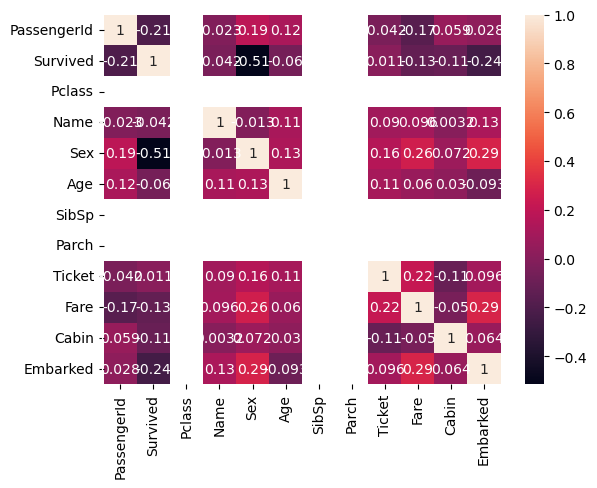

In [67]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

Now dropping the uniques columns at these datasets the name and ticket is uniques

In [69]:
# dropping the name and ticket columns
df1.drop(['Name', 'Ticket','PassengerId'], axis=1, inplace=True)

In [70]:
# Separating the independent and target varaible into x and y
x = df1.drop(['Survived'], axis=1)  # Features we remove price columns
y = df1['Survived']    #  Here now the price is my target variable
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (184, 8)
Label Dimensions (184,)


In [71]:
y.value_counts()

0    140
1     44
Name: Survived, dtype: int64

Here we can see that the data is not balance so now we balancing the data using smote method

In [72]:
# Oversampling used to balance the data
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [73]:
y1.value_counts()

1    140
0    140
Name: Survived, dtype: int64

Here the data is balanced

Now find the best model to fit these datasets

# Find the best model

In [74]:
# import libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [75]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 50):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=i)
    
    # Initializing and training the RandomForestClassifier
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    
    # Making predictions on the test set
    pred = RFR.predict(x_test)
    
    # Calculating accuracy of the model
    acc = accuracy_score(y_test, pred)
    
    # Updating maxAccu and maxRS if current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

# Best accuracy and random state 

In [76]:
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.9404761904761905 at random_state 21


Here is the accuracy is 95 % and random state is 21

# Creating train test split

In [77]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state=21)

Now cheking one by one all classification models

# Random Forest Classifier

In [78]:
# Instantiate and train RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Make predictions on the test set
pred_rf = rf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_rf)
print("Classification Report:")
print(report)

Accuracy: 0.9285714285714286
Confusion Matrix:
[[39  3]
 [ 3 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.93      0.93      0.93        42

    accuracy                           0.93        84
   macro avg       0.93      0.93      0.93        84
weighted avg       0.93      0.93      0.93        84



# Support Vector Machine Classifier

In [79]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_svc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_svc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_svc)
print("Classification Report:")
print(report)

Accuracy: 0.5714285714285714
Confusion Matrix:
[[19 23]
 [13 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.45      0.51        42
           1       0.56      0.69      0.62        42

    accuracy                           0.57        84
   macro avg       0.58      0.57      0.57        84
weighted avg       0.58      0.57      0.57        84



# GradientBoostingClassifier

In [80]:
# Checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_gb=GB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_gb)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_gb)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_gb)
print("Classification Report:")
print(report)

Accuracy: 0.9166666666666666
Confusion Matrix:
[[39  3]
 [ 4 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.93      0.90      0.92        42

    accuracy                           0.92        84
   macro avg       0.92      0.92      0.92        84
weighted avg       0.92      0.92      0.92        84



# AdaBoostClassifier

In [81]:
# Checking accuracy for AdaBoostClassifier
AB = AdaBoostClassifier()
AB.fit(x_train,y_train)
pred_ab=AB.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_ab)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_ab)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_ab)
print("Classification Report:")
print(report)

Accuracy: 0.9166666666666666
Confusion Matrix:
[[38  4]
 [ 3 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.91      0.93      0.92        42

    accuracy                           0.92        84
   macro avg       0.92      0.92      0.92        84
weighted avg       0.92      0.92      0.92        84



# BaggingClassifier

In [82]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
pred_bc=BC.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_bc)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_bc)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_bc)
print("Classification Report:")
print(report)

Accuracy: 0.8928571428571429
Confusion Matrix:
[[37  5]
 [ 4 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        42
           1       0.88      0.90      0.89        42

    accuracy                           0.89        84
   macro avg       0.89      0.89      0.89        84
weighted avg       0.89      0.89      0.89        84



# ExtraTreesClassifier

In [83]:
# Checking accuracy for the ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_et=ET.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_et)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_et)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
report = classification_report(y_test, pred_et)
print("Classification Report:")
print(report)

Accuracy: 0.9404761904761905
Confusion Matrix:
[[39  3]
 [ 2 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.93      0.95      0.94        42

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



Now we checked all models and observed the Random Forest Classifier  is best model of these datasets

# Hyper parameter tuning

In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=21)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]       # Minimum number of samples required at each leaf node
}

In [85]:
# Initialize Grid Search with the defined parameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Perform Grid Search on the training data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [87]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [90]:
Model = RandomForestClassifier ( min_samples_leaf=2 , max_depth = None,min_samples_split = 5,n_estimators = 100)
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

96.42857142857143


# Saving the model using joblib

In [91]:
# Saving the model
import joblib
joblib.dump(Model,"titanic.pkl")

['titanic.pkl']

In [92]:
import pickle
filename = "titanic.pkl"
pickle.dump(Model, open(filename,'wb'))  #Saved model

# Final Accuracy

In [93]:
load_model = pickle.load(open("titanic.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

96.42857142857143


# Conclusion

In [94]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

0   1   2   3   4   5   6   7   8   9   ...  74  75  76  77  78  \
Predicted   0   0   0   1   0   1   1   0   0   0  ...   0   0   1   0   0   
Original    0   0   0   1   0   1   1   0   0   0  ...   0   0   1   1   0   

           79  80  81  82  83  
Predicted   1   1   0   1   0  
Original    1   1   0   1   0  

[2 rows x 84 columns]

In [95]:
# Now  we have to add this data in the input
x

Pclass  Sex        Age  SibSp  Parch    Fare  Cabin  Embarked
2         3  0.0  26.000000      0      0  7.9250   13.0       2.0
4         3  1.0  35.000000      0      0  8.0500   13.0       2.0
12        3  1.0  20.000000      0      0  8.0500   31.0       2.0
14        3  0.0  14.000000      0      0  7.8542   28.0       2.0
22        3  0.0  15.000000      0      0  8.0292   43.0       1.0
..      ...  ...        ...    ...    ...     ...    ...       ...
870       3  1.0  26.000000      0      0  7.8958   19.0       2.0
877       3  1.0  19.000000      0      0  7.8958   40.0       2.0
878       3  1.0  29.699118      0      0  7.8958   73.0       2.0
881       3  1.0  33.000000      0      0  7.8958   17.0       2.0
890       3  1.0  32.000000      0      0  7.7500   63.0       1.0

[184 rows x 8 columns]

Now we ready the diagram to predict the people survived or not

In [112]:
import numpy as np

# Define input data (Titanic data)
input_data = np.array([[3,0.0,26.000000,0,0,7.9250,13.0,2.0]])  # Example input data (single sample)

# Make prediction using the trained SVR model
prediction = Model.predict(input_data)  # Use 'svr' for prediction
print("Input Data:", input_data)
print("Titanic surived :",prediction)

Input Data: [[ 3.     0.    26.     0.     0.     7.925 13.     2.   ]]
Titanic surived : [1]


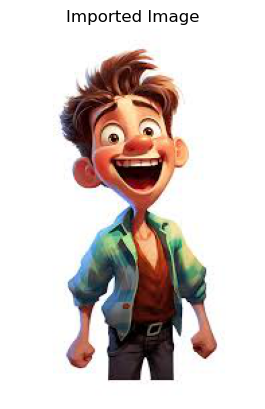

People will be able to survive during disaster.


In [113]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the condition # Change this condition as per your requirement

if prediction == 1:
    # Load and display the first image
    image_path = "C:/Users/ssour/Downloads/download (8).jpeg"  # Specify the path to the first image file
elif prediction == 0:
    # Load and display the second image
    image_path = "C:/Users/ssour/Downloads/download (9).jpeg"  # Specify the path to the second image file
else:
    # Default behavior if prediction is neither 1 nor 0
    print("Invalid prediction value. No image to display.")
    image_path = None

if image_path:
    # Open and display the image using matplotlib
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title('Imported Image')
    plt.axis('off')  # Turn off axis
    plt.show()

if prediction == 0:
    print("People will not be able to survive during disaster.")
else:
    print("People will be able to survive during disaster.")

# Thank you